1. Проанализировать данные, которые вам попались. Какие выводы можно сделать только из анализа? Проведите визуальный и статический анализ, опишите ваши находки.
2. Определите, какое моделирование доступно для ваших данных. Какие есть в них связи? 
3. Опишите возможные верхнеуровневые задачи, которые можно решать с помощью таких данных.
4. Очистите и обработайте данные. Опишите, какие в них были проблемы.
4. Постройте подходящую предсказательную модель. Обоснуйте ее выбор.
5. Выберите и обоснуйте метрики для ее оценки. Покажите, как модель работает на данных, которые не видела при обучении.
6. Представьте, что решаете реальную бизнес-задачу. Как вы могли бы использовать вашу модель? Какие бизнес-метрики могли бы быть использованы для ее контроля?

Импорт необходимых библиотек

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Библиотеки для коллаборативной модели (Surprise)
from surprise import SVD, SVDpp, Dataset, Reader, accuracy
from surprise.model_selection import GridSearchCV

# Библиотеки для контентной модели
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


sns.set(style="whitegrid")
%matplotlib inline

Загрузка данных

In [77]:
chefmozaccepts   = pd.read_csv("chefmozaccepts.csv")
chefmozcuisine   = pd.read_csv("chefmozcuisine.csv")
chefmozhours4    = pd.read_csv("chefmozhours4.csv")
chefmozparking   = pd.read_csv("chefmozparking.csv")
geoplaces2       = pd.read_csv("geoplaces2.csv")
rating_final     = pd.read_csv("rating_final.csv")
usercuisine      = pd.read_csv("usercuisine.csv")
userpayment      = pd.read_csv("userpayment.csv")
userprofile      = pd.read_csv("userprofile.csv")


In [88]:
# Вывод информации по DataFrame
print("Информация по chefmozaccepts:")
print(chefmozaccepts.info())
print(chefmozaccepts.head(), "\n")

print("Информация по chefmozcuisine:")
print(chefmozcuisine.info())
print(chefmozcuisine.head(), "\n")

print("Информация по chefmozhours4:")
print(chefmozhours4.info())
print(chefmozhours4.head(), "\n")

print("Информация по chefmozparking:")
print(chefmozparking.info())
print(chefmozparking.head(), "\n")

print("Информация по geoplaces2:")
print(geoplaces2.info())
print(geoplaces2.head(), "\n")

print("Информация по rating_final:")
print(rating_final.info())
print(rating_final.head(), "\n")

print("Информация по usercuisine:")
print(usercuisine.info())
print(usercuisine.head(), "\n")

print("Информация по userpayment:")
print(userpayment.info())
print(userpayment.head(), "\n")

print("Информация по userprofile:")
print(userprofile.info())
print(userprofile.head(), "\n")

Информация по chefmozaccepts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   placeID   1314 non-null   int64 
 1   Rpayment  1314 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.7+ KB
None
   placeID             Rpayment
0   135110                 cash
1   135110                 visa
2   135110  mastercard-eurocard
3   135110     american_express
4   135110     bank_debit_cards 

Информация по chefmozcuisine:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   placeID   916 non-null    int64 
 1   Rcuisine  916 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.4+ KB
None
   placeID        Rcuisine
0   135110         spanish
1   135109         italian
2   135107  latin_american
3   135106  

Первичные выводы:
Различные источники данных: Данные разбиты на группы: рестораны, пользователи и рейтинги.

Различные типы атрибутов: Присутствуют номинальные, числовые и геопространственные данные.

Наличие пропущенных значений: Например, в geoplaces2.csv пропуски в адресе, городе, штате, а также в некоторых столбцах userprofile.csv.


Очистка и предварительная обработка данных

Выявленные проблемы:

Пропущенные значения: Некоторые столбцы содержат много пропусков (например, адрес, город в geoplaces2, некоторые атрибуты в userprofile).

Различные форматы данных: Некоторые столбцы требуют преобразования (например, время в chefmozhours4).

Дублирование информации: Возможны повторяющиеся записи, что требует их удаления или агрегации.

Размерность one-hot представления кухонь: (916, 59)
Уникальные рейтинги: [2 1 0]

Обработанные chefmozaccepts:
   placeID             Rpayment
0   135110                 cash
1   135110                 visa
2   135110  mastercard-eurocard
3   135110     american_express
4   135110     bank_debit_cards

Обработанные chefmozcuisine:
   placeID        Rcuisine
0   135110         spanish
1   135109         italian
2   135107  latin_american
3   135106         mexican
4   135105       fast_food

Обработанные chefmozhours4:
         hours open_time_str close_time_str  open_hour  close_hour  \
0  00:00-23:30         00:00          23:30          0        23.0   
1  00:00-23:30         00:00          23:30          0        23.0   
2  00:00-23:30         00:00          23:30          0        23.0   
3  08:00-19:00         08:00          19:00          8        19.0   
4  00:00-00:00         00:00          00:00          0         0.0   

                   days_list  
0  [Mon, Tue, Wed, Thu, 

C:\Users\sahav\AppData\Local\Temp\ipykernel_15768\279225989.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=rating_final, palette="viridis")


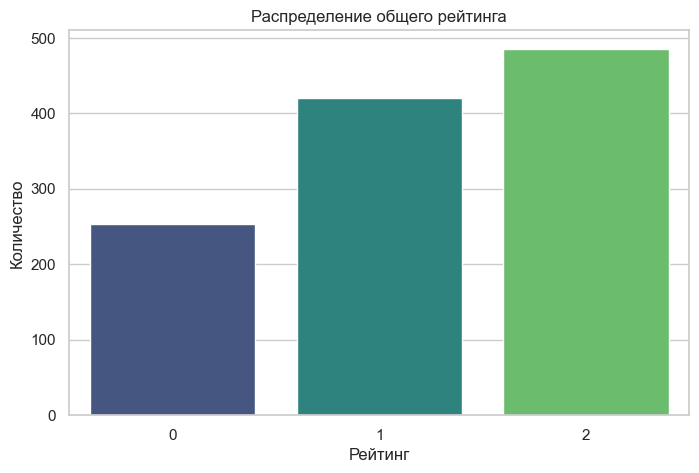

C:\Users\sahav\AppData\Local\Temp\ipykernel_15768\279225989.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chefmozcuisine_counts.index[:15], y=chefmozcuisine_counts.values[:15], palette="magma")


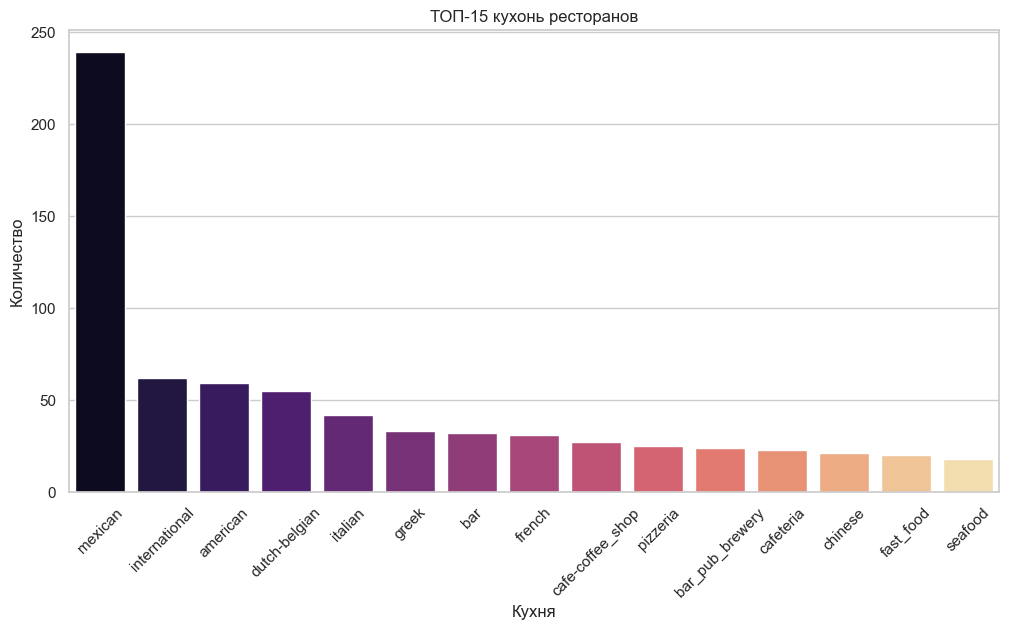

C:\Users\sahav\AppData\Local\Temp\ipykernel_15768\279225989.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Upayment', data=userpayment, palette='pastel')


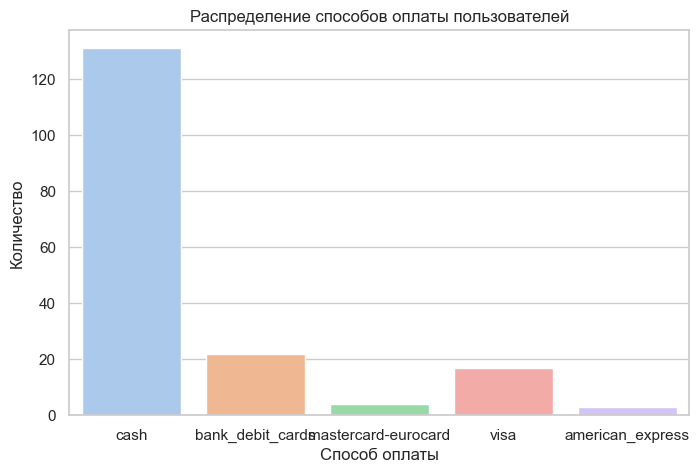

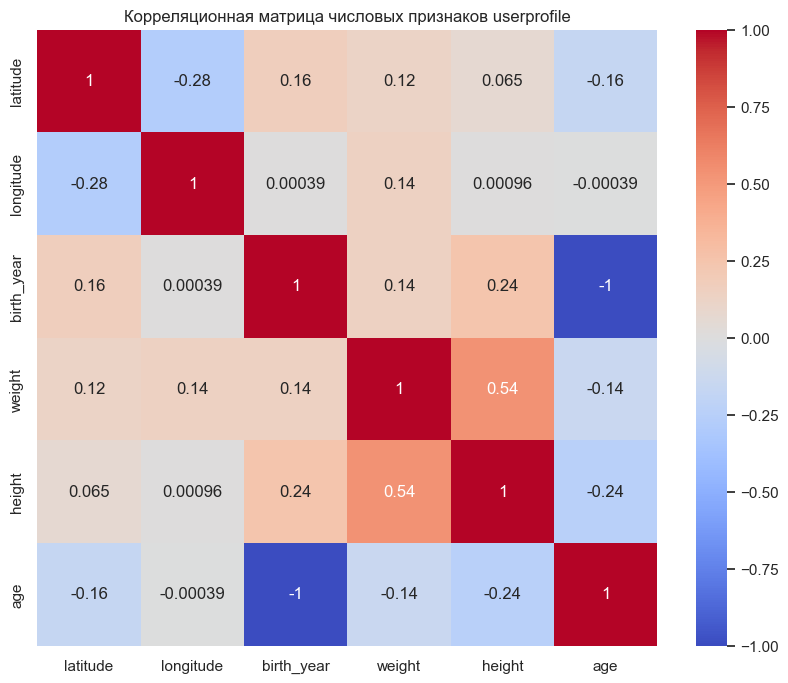

In [78]:
# --- 3.1. Обработка chefmozaccepts ---
chefmozaccepts['Rpayment'] = chefmozaccepts['Rpayment'].str.lower().str.strip()

# --- 3.2. Обработка chefmozcuisine ---
chefmozcuisine['Rcuisine'] = chefmozcuisine['Rcuisine'].str.lower().str.strip()
chefmozcuisine_dummies = pd.get_dummies(chefmozcuisine['Rcuisine'], prefix='cuisine')
print("Размерность one-hot представления кухонь:", chefmozcuisine_dummies.shape)

# --- 3.3. Обработка chefmozhours4 ---
chefmozhours4['hours'] = chefmozhours4['hours'].str.replace(";", "").str.strip()
# Разбиваем строку на две части (n=1)
chefmozhours4[['open_time_str', 'close_time_str']] = chefmozhours4['hours'].str.split("-", n=1, expand=True)
chefmozhours4['open_time_str'] = chefmozhours4['open_time_str'].str.strip()
chefmozhours4['close_time_str'] = chefmozhours4['close_time_str'].str.strip()
chefmozhours4['open_hour'] = pd.to_datetime(chefmozhours4['open_time_str'], format="%H:%M", errors='coerce').dt.hour
chefmozhours4['close_hour'] = pd.to_datetime(chefmozhours4['close_time_str'], format="%H:%M", errors='coerce').dt.hour
chefmozhours4['days_list'] = chefmozhours4['days'].apply(lambda x: [d.strip() for d in x.split(';') if d.strip() != ""])

# --- 3.4. Обработка chefmozparking ---
chefmozparking['parking_lot'] = chefmozparking['parking_lot'].str.lower().str.strip()

# --- 3.5. Обработка geoplaces2 ---
for col in ['address', 'city', 'state', 'country', 'url']:
    if col in geoplaces2.columns:
        geoplaces2[col] = geoplaces2[col].fillna("unknown")
        
str_cols = ['name', 'address', 'city', 'state', 'country', 'alcohol', 
            'smoking_area', 'dress_code', 'accessibility', 'price', 
            'rambience', 'franchise', 'area', 'other_services']
for col in str_cols:
    if col in geoplaces2.columns:
        geoplaces2[col] = geoplaces2[col].str.lower().str.strip()

# --- 3.6. Обработка rating_final ---
print("Уникальные рейтинги:", rating_final['rating'].unique())

# --- 3.7. Обработка usercuisine ---
usercuisine['Rcuisine'] = usercuisine['Rcuisine'].str.lower().str.strip()

# --- 3.8. Обработка userpayment ---
userpayment['Upayment'] = userpayment['Upayment'].str.lower().str.strip()

# --- 3.9. Обработка userprofile ---
userprofile_cols = ['smoker', 'drink_level', 'dress_preference', 'ambience', 
                    'transport', 'marital_status', 'hijos', 'interest', 
                    'personality', 'religion', 'activity', 'color', 'budget']
for col in userprofile_cols:
    userprofile[col] = userprofile[col].str.lower().str.strip()
current_year = pd.to_datetime("today").year
userprofile['age'] = current_year - userprofile['birth_year']

# Вывод результатов обработки для проверки
print("\nОбработанные chefmozaccepts:")
print(chefmozaccepts.head())
print("\nОбработанные chefmozcuisine:")
print(chefmozcuisine.head())
print("\nОбработанные chefmozhours4:")
print(chefmozhours4[['hours', 'open_time_str', 'close_time_str', 'open_hour', 'close_hour', 'days_list']].head())
print("\nОбработанные chefmozparking:")
print(chefmozparking.head())
print("\nОбработанные geoplaces2:")
print(geoplaces2.head())
print("\nОбработанные rating_final:")
print(rating_final.head())
print("\nОбработанные usercuisine:")
print(usercuisine.head())
print("\nОбработанные userpayment:")
print(userpayment.head())
print("\nОбработанные userprofile:")
print(userprofile.head())

# График 1: Распределение общего рейтинга (rating_final)
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=rating_final, palette="viridis")
plt.title("Распределение общего рейтинга")
plt.xlabel("Рейтинг")
plt.ylabel("Количество")
plt.show()

# График 2: ТОП-15 типов кухонь ресторанов (chefmozcuisine)
plt.figure(figsize=(12,6))
chefmozcuisine_counts = chefmozcuisine['Rcuisine'].value_counts().sort_values(ascending=False)
sns.barplot(x=chefmozcuisine_counts.index[:15], y=chefmozcuisine_counts.values[:15], palette="magma")
plt.xticks(rotation=45)
plt.title("ТОП-15 кухонь ресторанов")
plt.xlabel("Кухня")
plt.ylabel("Количество")
plt.show()

# График 3: Распределение способов оплаты пользователей (userpayment)
plt.figure(figsize=(8,5))
sns.countplot(x='Upayment', data=userpayment, palette='pastel')
plt.title("Распределение способов оплаты пользователей")
plt.xlabel("Способ оплаты")
plt.ylabel("Количество")
plt.show()

# График 4: Корреляционная матрица для числовых признаков userprofile
num_columns = userprofile.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10,8))
corr = userprofile[num_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица числовых признаков userprofile")
plt.show()


Мексиканская кухня более популярна, а оплата чаще всего происходит наличными

Возможные подходы к моделированию:

Коллаборативная фильтрация: На основе файла rating_final.csv можно построить модель, предсказывающую рейтинг ресторана пользователем. Здесь используются связи между пользователями и ресторанами.

Контекстный подход: Использование остальных файлов (данные о ресторанах, профилях пользователей, их предпочтениях) для создания рекомендаций с учетом контекста (тип кухни, расположение, часы работы и т.д.).

Гибридный подход: Объединение двух вышеуказанных методов для повышения точности рекомендаций.

Обнаруженные связи:

Пользователь – Ресторан – Рейтинг: Прямая связь, позволяющая применять модели коллаборативной фильтрации.

Пользователь – Предпочтения (кухня, оплата, профиль): Связь, позволяющая сегментировать пользователей и рекомендовать рестораны, соответствующие их профилю.

Ресторан – Характеристики (кухня, часы работы, парковка, геолокация): Связь, позволяющая учитывать контекст ресторана.

In [79]:
# Для chefmozcuisine выбираем первый тип кухни для каждого ресторана
chefmozcuisine_first = chefmozcuisine.groupby('placeID')['Rcuisine'].first().reset_index()

# Приводим ключевые столбцы к одному формату
userprofile['userID'] = userprofile['userID'].astype(str)
geoplaces2['placeID'] = geoplaces2['placeID'].astype(int)
chefmozcuisine_first['placeID'] = chefmozcuisine_first['placeID'].astype(int)

# Объединяем rating_final с дополнительными данными
ratings_merged = rating_final.merge(userprofile, on='userID', how='left')\
                             .merge(geoplaces2, on='placeID', how='left', suffixes=("", "_rest"))\
                             .merge(chefmozcuisine_first, on='placeID', how='left')
ratings_merged['age'] = current_year - ratings_merged['birth_year']

# Сортируем по ключам для согласования порядка
ratings_merged = ratings_merged.sort_values(by=['userID','placeID']).reset_index(drop=True)
filtered_rating_final = rating_final.sort_values(by=['userID','placeID']).reset_index(drop=True)
print("Общее количество записей:", filtered_rating_final.shape[0])

Общее количество записей: 1161


In [80]:
train_idx, test_idx = train_test_split(filtered_rating_final.index, test_size=0.2, random_state=42)


Постановка задачи - создание рекомендательной системы для прогнозирования рейтингов

Метрики для оценки модели:

RMSE (среднеквадратичная ошибка): Хорошо показывает расхождение предсказанных и реальных рейтингов.

MAE (средняя абсолютная ошибка): Более устойчива к выбросам и легко интерпретируема.

Применение модели в бизнес-задаче:

Рекомендации ресторанов: Модель позволяет предлагать пользователям рестораны, соответствующие их вкусам и предпочтениям.

Коллаборативная модель: оптимизация SVD

In [81]:
reader = Reader(rating_scale=(0, 2))
svd_df = filtered_rating_final.loc[np.concatenate((train_idx, test_idx)), ['userID', 'placeID', 'rating']]
data_surprise = Dataset.load_from_df(svd_df, reader)
# Оптимизация гиперпараметров не проводим повторно здесь – можно использовать найденные параметры
# Если нужно, можно добавить GridSearchCV. Для демонстрации обучаем SVD с выбранными параметрами.
svd_model = SVD(n_factors=20, lr_all=0.01, reg_all=0.1, random_state=42)
# Разделяем на train/test для Surprise
svd_train_df = filtered_rating_final.loc[train_idx, ['userID', 'placeID', 'rating']]
svd_test_df = filtered_rating_final.loc[test_idx, ['userID', 'placeID', 'rating']]
data_train = Dataset.load_from_df(svd_train_df, reader)
trainset = data_train.build_full_trainset()
svd_model.fit(trainset)
testset_custom = list(svd_test_df.itertuples(index=False, name=None))
predictions_svd = svd_model.test(testset_custom)
rmse_svd = accuracy.rmse(predictions_svd, verbose=True)
mae_svd = accuracy.mae(predictions_svd, verbose=True)
svd_pred_df = pd.DataFrame([(str(pred.uid), int(pred.iid), pred.r_ui, pred.est) 
                            for pred in predictions_svd],
                           columns=['userID', 'placeID', 'true_rating', 'svd_pred'])


RMSE: 0.6262
MAE:  0.4999


SVD++ (расширенная коллаборативная модель)

In [82]:
svdpp_model = SVDpp(n_factors=10, lr_all=0.01, reg_all=0.2, random_state=42)
svdpp_model.fit(trainset)
predictions_svdpp = svdpp_model.test(testset_custom)
rmse_svdpp = accuracy.rmse(predictions_svdpp, verbose=True)
mae_svdpp = accuracy.mae(predictions_svdpp, verbose=True)
svdpp_pred_df = pd.DataFrame([(str(pred.uid), int(pred.iid), pred.r_ui, pred.est) 
                              for pred in predictions_svdpp],
                             columns=['userID', 'placeID', 'true_rating', 'svdpp_pred'])


RMSE: 0.6245
MAE:  0.5037


RandomForestRegressor

In [83]:
# Формируем набор признаков
features = ['age', 'drink_level', 'dress_preference', 'ambience', 
            'transport', 'marital_status', 'price', 'Rcuisine', 'latitude_rest', 'longitude_rest']
model_data = ratings_merged[['rating'] + features].copy().reset_index(drop=True)
# Заполняем пропуски
categorical_features = ['drink_level', 'dress_preference', 'ambience', 'transport', 'marital_status', 'price', 'Rcuisine']
for col in categorical_features:
    model_data[col] = model_data[col].fillna("unknown")
numeric_features = ['age', 'latitude_rest', 'longitude_rest']
for col in numeric_features:
    model_data[col] = model_data[col].fillna(model_data[col].median())
# One-hot кодирование
model_data_encoded = pd.get_dummies(model_data, columns=categorical_features, drop_first=True)
# Добавляем ключи
model_data_encoded = pd.concat([ratings_merged[['userID', 'placeID']].reset_index(drop=True), model_data_encoded], axis=1)
# Разбиваем данные (без перемешивания для сохранения порядка)
X_full = model_data_encoded.drop('rating', axis=1)
y_full = model_data_encoded['rating']
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42, shuffle=False)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train.drop(['userID', 'placeID'], axis=1), y_train)
rf_pred = rf_model.predict(X_test.drop(['userID', 'placeID'], axis=1))
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))
mae_rf = mean_absolute_error(y_test, rf_pred)
print("RandomForest - RMSE: {:.4f}, MAE: {:.4f}".format(rmse_rf, mae_rf))
rf_pred_df = X_test[['userID', 'placeID']].copy().reset_index(drop=True)
rf_pred_df['true_rating'] = y_test.reset_index(drop=True)
rf_pred_df['rf_pred'] = rf_pred


RandomForest - RMSE: 0.9147, MAE: 0.7867


GradientBoostingRegressor

In [84]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train.drop(['userID', 'placeID'], axis=1), y_train)
gb_pred = gb_model.predict(X_test.drop(['userID', 'placeID'], axis=1))
rmse_gb = np.sqrt(mean_squared_error(y_test, gb_pred))
mae_gb = mean_absolute_error(y_test, gb_pred)
print("GradientBoosting - RMSE: {:.4f}, MAE: {:.4f}".format(rmse_gb, mae_gb))
gb_pred_df = X_test[['userID', 'placeID']].copy().reset_index(drop=True)
gb_pred_df['true_rating'] = y_test.reset_index(drop=True)
gb_pred_df['gb_pred'] = gb_pred

GradientBoosting - RMSE: 0.9515, MAE: 0.8077


In [85]:
print("\nРезультаты моделей:")
print("SVD:      RMSE = {:.4f}, MAE = {:.4f}".format(rmse_svd, mae_svd))
print("SVD++:    RMSE = {:.4f}, MAE = {:.4f}".format(rmse_svdpp, mae_svdpp))
print("RandomForest: RMSE = {:.4f}, MAE = {:.4f}".format(rmse_rf, mae_rf))
print("GradientBoosting: RMSE = {:.4f}, MAE = {:.4f}".format(rmse_gb, mae_gb))


Результаты моделей:
SVD:      RMSE = 0.6262, MAE = 0.4999
SVD++:    RMSE = 0.6245, MAE = 0.5037
RandomForest: RMSE = 0.9147, MAE = 0.7867
GradientBoosting: RMSE = 0.9515, MAE = 0.8077


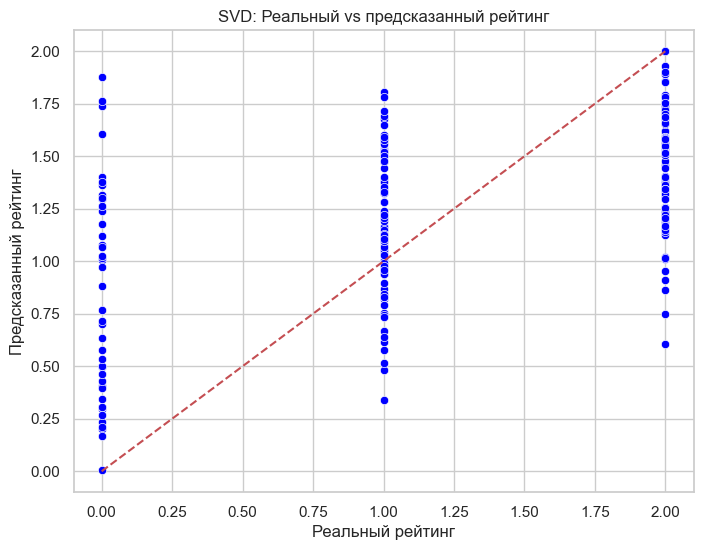

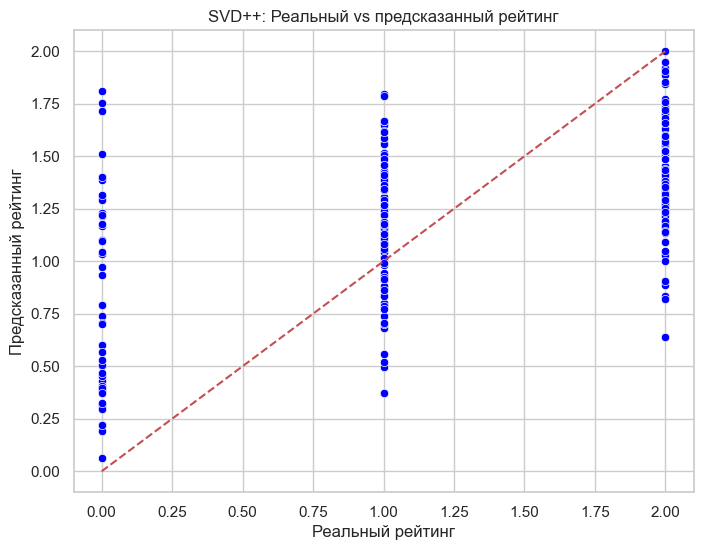

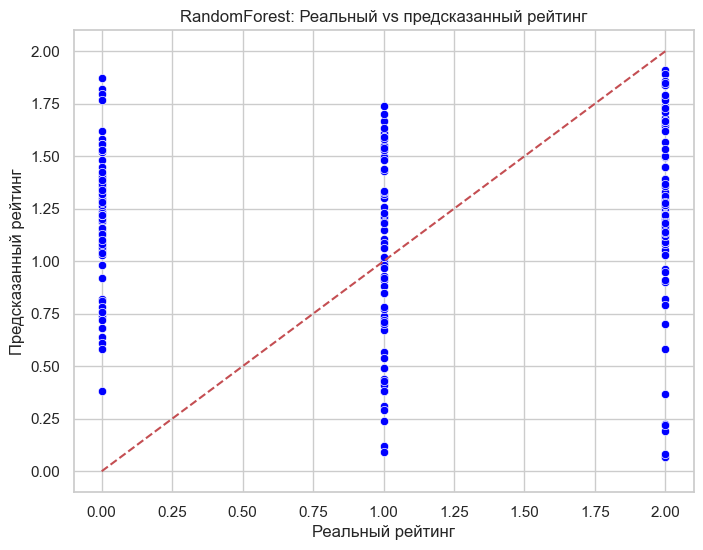

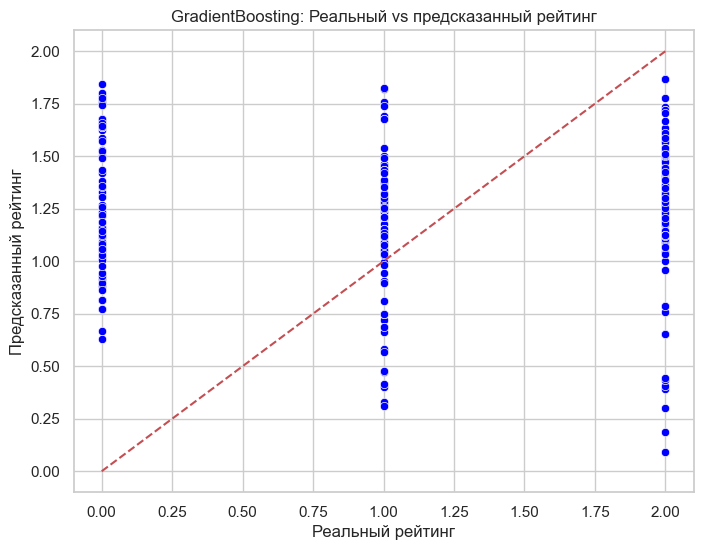

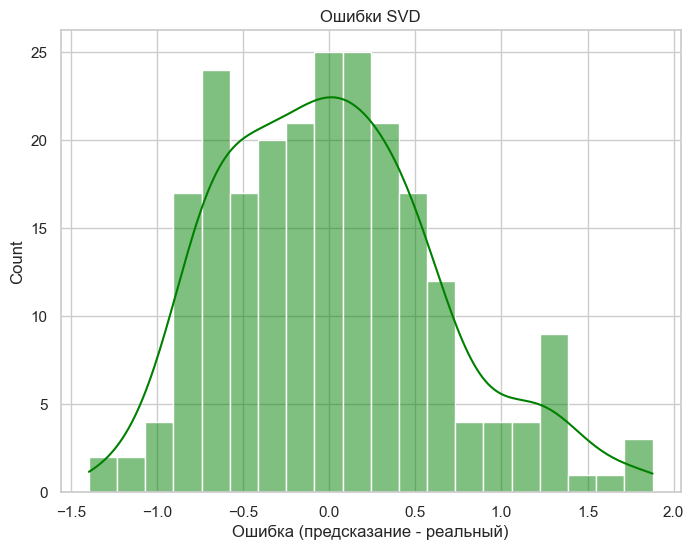

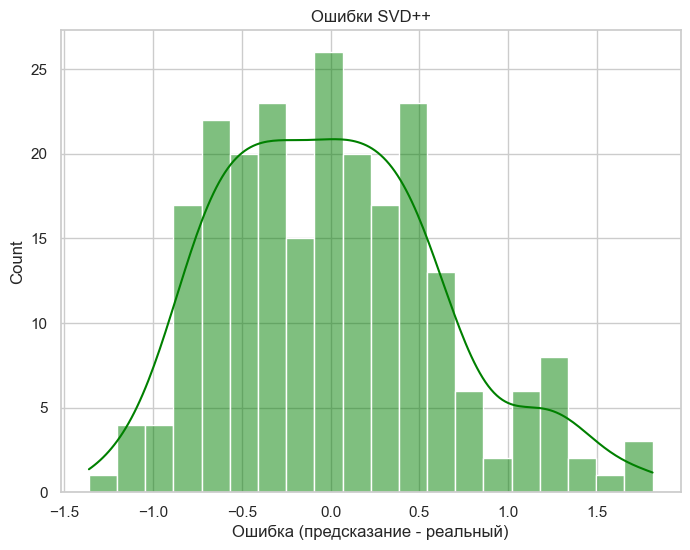

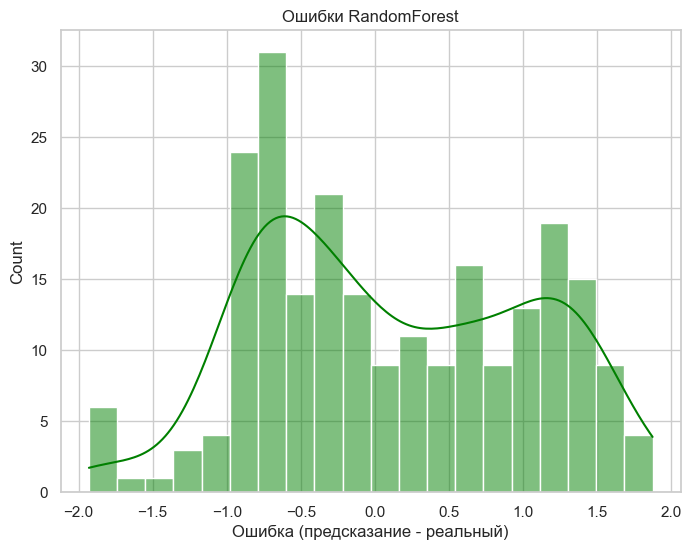

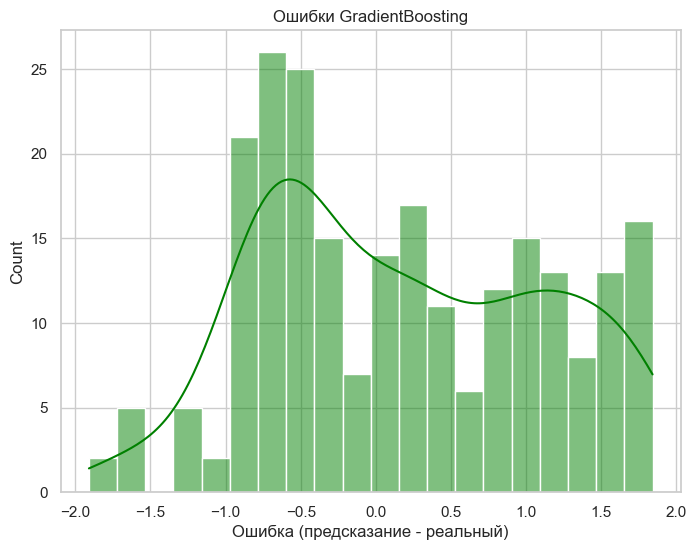

In [86]:
# Функция для построения scatter plot: реальные vs предсказанные
def plot_scatter(true_vals, pred_vals, title, xlabel, ylabel):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=true_vals, y=pred_vals, color='blue')
    plt.plot([min(true_vals), max(true_vals)], [min(true_vals), max(true_vals)], 'r--')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# SVD
plot_scatter(svd_pred_df['true_rating'], svd_pred_df['svd_pred'],
             "SVD: Реальный vs предсказанный рейтинг", "Реальный рейтинг", "Предсказанный рейтинг")

# SVD++
plot_scatter(svdpp_pred_df['true_rating'], svdpp_pred_df['svdpp_pred'],
             "SVD++: Реальный vs предсказанный рейтинг", "Реальный рейтинг", "Предсказанный рейтинг")

# RandomForest
plot_scatter(rf_pred_df['true_rating'], rf_pred_df['rf_pred'],
             "RandomForest: Реальный vs предсказанный рейтинг", "Реальный рейтинг", "Предсказанный рейтинг")

# GradientBoosting
plot_scatter(gb_pred_df['true_rating'], gb_pred_df['gb_pred'],
             "GradientBoosting: Реальный vs предсказанный рейтинг", "Реальный рейтинг", "Предсказанный рейтинг")

# Гистограммы ошибок для каждой модели
def plot_error_hist(errors, title):
    plt.figure(figsize=(8,6))
    sns.histplot(errors, bins=20, kde=True, color='green')
    plt.xlabel("Ошибка (предсказание - реальный)")
    plt.title(title)
    plt.show()

plot_error_hist(svd_pred_df['svd_pred'] - svd_pred_df['true_rating'], "Ошибки SVD")
plot_error_hist(svdpp_pred_df['svdpp_pred'] - svdpp_pred_df['true_rating'], "Ошибки SVD++")
plot_error_hist(rf_pred_df['rf_pred'] - rf_pred_df['true_rating'], "Ошибки RandomForest")
plot_error_hist(gb_pred_df['gb_pred'] - gb_pred_df['true_rating'], "Ошибки GradientBoosting")